In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
import librosa as lb
from librosa import display

In [ ]:
# train=np.load("audio_train.npy")
# test=np.load("audio_test.npy")
from google.colab import drive
drive.mount('/content/gdrive')
train=np.load("gdrive/My Drive/audio-classification/audio_train.npy")
test=np.load("gdrive/My Drive/audio-classification/audio_test.npy")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train.shape

(942, 30000)

In [ ]:
type(train)

numpy.ndarray

In [ ]:
train

array([[-0.92577249, -0.66291571, -0.26374164, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.94556701,  1.11562371,  1.10488427, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01025403, -0.01226821, -0.01267925, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.00239253,  1.10180998,  1.03759027, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00936416, -0.01141811, -0.01222591, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87232733, -0.1913518 ,  0.57717735, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
#train_labels=pd.read_csv("labels_train.csv",usecols=['label']).to_numpy()
train_labels=pd.read_csv("gdrive/My Drive/audio-classification/labels_train.csv",usecols=['label']).to_numpy()

In [ ]:
train_labels

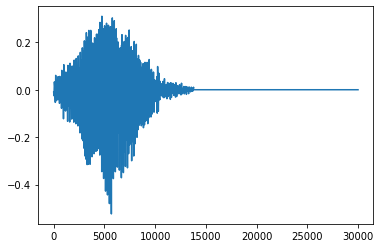

In [ ]:
plt.plot(train[2])

In [ ]:
train_spectograms = []
for i in range(train.shape[0]):
    spectogram = lb.stft(train[i])
    Xdb = lb.amplitude_to_db(abs(spectogram))
    train_spectograms.append(Xdb)

In [ ]:
train_spectograms = np.array(train_spectograms)

In [ ]:
type(train_spectograms)

numpy.ndarray

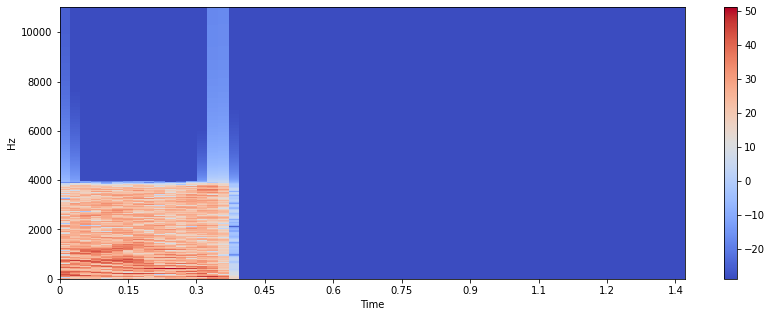

In [ ]:
plt.figure(figsize=(14, 5))
lb.display.specshow(train_spectograms[0], x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_spectograms, train_labels, test_size=0.40, random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(565, 1025, 59)
(377, 1025, 59)
(565, 1)
(377, 1)


In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(565, 1025, 59, 1)
(377, 1025, 59, 1)
(565, 1)
(377, 1)


In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3),activation='relu', input_shape=X_train[0].shape))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3),activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3),activation='relu'))

model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2),activation='relu', input_shape=X_train[0].shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2),activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1024, 58, 32)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 512, 29, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 511, 28, 64)       8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 255, 14, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 254, 13, 64)       16448     
Total params: 24,864
Trainable params: 24,864
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1024, 58, 32)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 512, 29, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 511, 28, 64)       8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 255, 14, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 254, 13, 64)       16448     
_________________________________________________________________
flatten (Flatten)            (None, 211328)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test,y_test))

Epoch 1/10
18/18 [==============================] - 38s 2s/step - loss: 42.4233 - accuracy: 0.1274 - val_loss: 2.2636 - val_accuracy: 0.0981
Epoch 2/10
18/18 [==============================] - 34s 2s/step - loss: 2.1052 - accuracy: 0.2531 - val_loss: 1.8810 - val_accuracy: 0.2732
Epoch 3/10
18/18 [==============================] - 34s 2s/step - loss: 1.6432 - accuracy: 0.4761 - val_loss: 1.3648 - val_accuracy: 0.5995
Epoch 4/10
18/18 [==============================] - 34s 2s/step - loss: 1.5541 - accuracy: 0.5770 - val_loss: 1.1723 - val_accuracy: 0.6446
Epoch 5/10
18/18 [==============================] - 34s 2s/step - loss: 0.9670 - accuracy: 0.7150 - val_loss: 1.1381 - val_accuracy: 0.6897
Epoch 6/10
18/18 [==============================] - 34s 2s/step - loss: 0.8551 - accuracy: 0.7221 - val_loss: 1.0721 - val_accuracy: 0.7162
Epoch 7/10
18/18 [==============================] - 34s 2s/step - loss: 0.6733 - accuracy: 0.7805 - val_loss: 0.7503 - val_accuracy: 0.7772
Epoch 8/10
18/18 [=

In [ ]:
test.shape

(558, 30000)

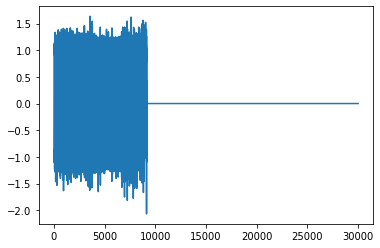

In [ ]:
plt.plot(test[0])

In [ ]:
test_spectograms = []
for i in range(test.shape[0]):
    spectogram = lb.stft(test[i])
    Xdb = lb.amplitude_to_db(abs(spectogram))
    test_spectograms.append(Xdb)

In [ ]:
test_spectograms = np.array(test_spectograms)

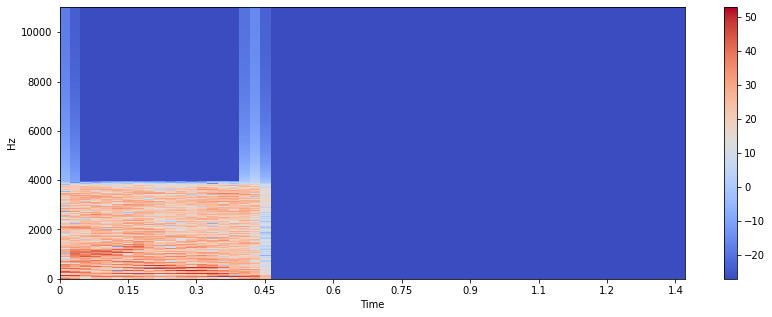

In [ ]:
plt.figure(figsize=(14, 5))
lb.display.specshow(test_spectograms[0], x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
test_spectograms.shape

(558, 1025, 59)

In [ ]:
test_spectograms = test_spectograms.reshape(test_spectograms.shape[0],test_spectograms.shape[1],test_spectograms.shape[2],1)

In [ ]:
test_spectograms.shape

(558, 1025, 59, 1)

In [ ]:
predictions = model.predict(test_spectograms)

In [ ]:
predictions

array([[ -1.8774714 ,  -1.7909966 , -14.491426  , ...,  -2.4968889 ,
         -3.576428  ,   0.13850349],
       [ -0.9229992 ,  -3.133828  , -14.84421   , ...,  -1.2076522 ,
         -2.3603697 ,   2.3089993 ],
       [-11.563593  ,   0.9948157 ,  -9.019291  , ...,   1.0658764 ,
         -0.15872711,  -7.791533  ],
       ...,
       [ -3.9369159 ,  -1.9498686 , -10.961319  , ...,   1.9511591 ,
         -3.128741  ,   0.19361252],
       [  1.9793457 ,  -0.05345735,  -9.958314  , ...,   4.835063  ,
         -5.2391844 ,  -1.1882193 ],
       [ -4.834501  ,  -1.7470578 , -10.598886  , ...,  -1.5766846 ,
         -2.5940714 ,  -2.184038  ]], dtype=float32)

In [ ]:
results = []
for i in range(len(predictions)):
    temp = []
    temp.append(i)
    temp.append(np.argmax(predictions[i]))
    results.append(temp)

In [ ]:
results

In [ ]:
results = pd.DataFrame(results,columns=['id','label'])

In [ ]:
results

,id,label
0,0,5
1,1,9
2,2,4
3,3,4
4,4,4
...,...,...
553,553,4
554,554,5
555,555,5
556,556,7


In [ ]:
from google.colab import files

results.to_csv('Results_25Sept.csv', sep=',',  index = False)

files.download('Results_25Sept.csv')
#results.to_csv("Results_2D_CNN_Attempt3.csv",index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>